In [80]:
import os
import numpy as np
from skimage.io import imread
from skimage.io import imsave
from glob import glob
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage.color as color
import torch
import torch.nn as nn
from imgaug import augmenters as iaa
from data import default_loader_custom
import h5py

In [28]:
def load_pic(path):
    pic = imread(path)
    print("pic_shape: ",pic.shape)
    class_name = get_class(path)
    if class_name == "malaria":
        pic = color.rgb2grey(pic)
        pic = invert(pic)
    elif class_name == "Human_HT29_colon-cancer" or class_name == "dna":
        #pic = color.rgb2grey(pic)
        pass
    elif class_name == "dp":
        pic = color.rgba2rgb(pic)
        pic = color.rgb2grey(pic)
        
    if (pic.dtype == 'uint16'):
        #print("anything else than double!!")
        if (pic.max()<32768):
            pic = pic.astype('int16')
        else:
            pic = pic.astype('int32')
    if (False):
        pic = pic.astype('float')


    #if (len(pic.shape)==2):
        #pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        #pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    
    #==========RESHAPING=============
    shorter_side = min(pic.shape[0], pic.shape[1])
    if (class_name == "Hela"):
        shorter_side = shorter_side//8
    if (class_name == "mSar"):
        shorter_side = shorter_side//6
    if (class_name == "malaria"):
        shorter_side = shorter_side//4
    if (class_name == "Human_Hepatocyte_Murine_Fibroblast"):
        shorter_side = int(shorter_side/2)
    scale = iaa.Resize({"shorter-side":shorter_side, "longer-side":"keep-aspect-ratio"}).augment_image
    pic = scale(pic)
         
    #===========CROP==================    
    #crop = iaa.CropToFixedSize(width=256, height=256).augment_image
    #pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

def get_class(path):
    return path.split('/')[-2]

In [29]:
def load(path):
    pic = default_loader_custom(path)
    #===========CROP==================    
    crop = iaa.CropToFixedSize(width=256, height=256).augment_image
    pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

In [39]:
def getImgs(pth, dataType):
    return glob(os.path.join(pth, dataType))

dir_path = "../../../scratch/slivinskiy/cycleGAN/train/A"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    pth_list.append(cls_imgs)

print(len(pth_list))

../../../scratch/slivinskiy/cycleGAN/train/A
44
../../../scratch/slivinskiy/cycleGAN/train/A/./A5--W00005--P00004--Z00000--T00000--Trans.tif
0


Class 1 :  .
pic_shape:  (2048, 2048)
Class 2 :  .
pic_shape:  (2048, 2048)
Class 3 :  .
pic_shape:  (2048, 2048)
Class 4 :  .
pic_shape:  (2048, 2048)
Class 5 :  .
pic_shape:  (2048, 2048)
Class 6 :  .
pic_shape:  (2048, 2048)
Class 7 :  .
pic_shape:  (2048, 2048)
Class 8 :  .
pic_shape:  (2048, 2048)
Class 9 :  .
pic_shape:  (2048, 2048)
Class 10 :  .
pic_shape:  (2048, 2048)


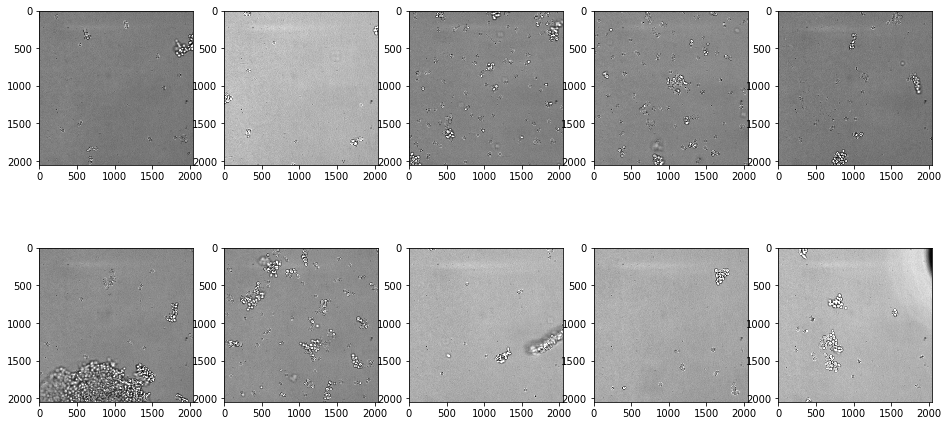

In [33]:
fig=plt.figure(figsize=(16, 8))
index = 35
columns = 5
rows = 2
j = 0
for i in range(1, columns*rows +1):
    if j>= len(pth_list):
        break
    print("Class", j+1,": ",classes[0])
    img = load_pic(pth_list[0][j])
    #img = img.transpose()
    #img = img[2]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
plt.show()

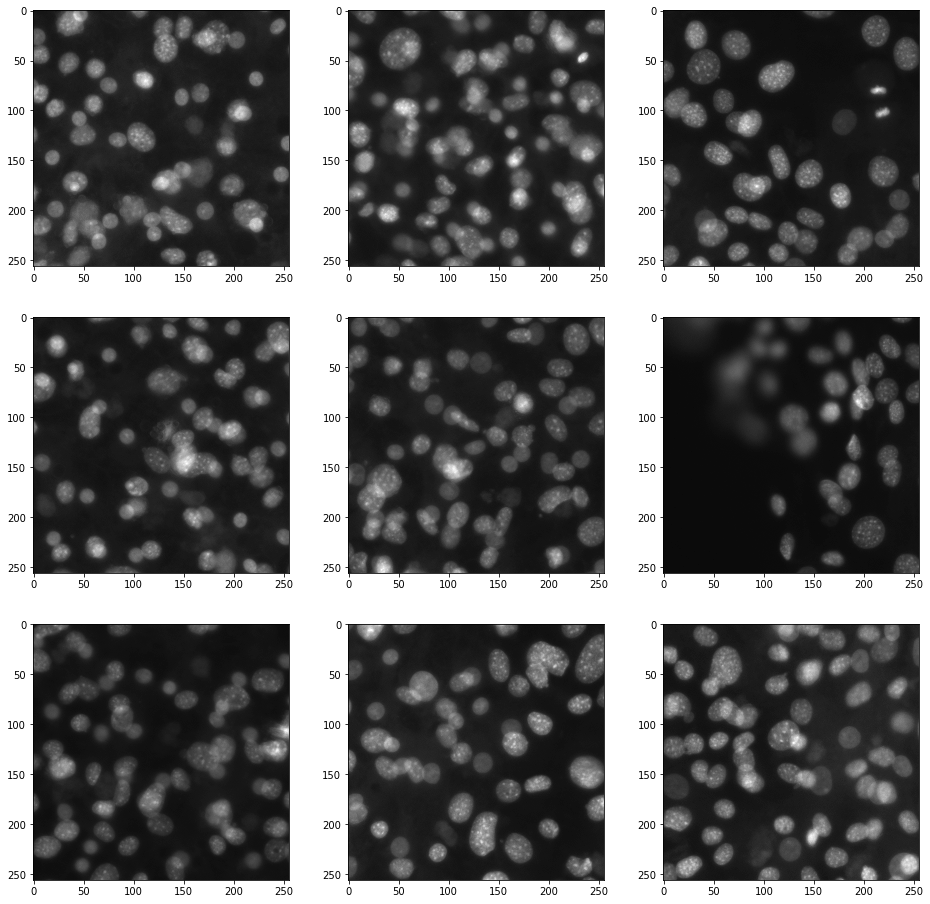

In [150]:
fig=plt.figure(figsize=(16, 16))
index = 6
columns = 3
rows = 3
j = 0
for i in range(1, columns*rows +1):
    img = load_pic(pth_list[7][j+10])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    j+=1
plt.show()

In [53]:
dir_path = "../../../scratch/bunk/cell2cell/test/A"
fol1 = "malaria"
fol2 = "Human_HT29_colon-cancer"
fol3 = "Hela"
fol4 = "dp"

impath_malaria = os.path.join(dir_path, fol1)
impath_malaria = os.path.join(impath_malaria, "*.png")
imlist_malaria = glob(impath_malaria)

impath_colon = os.path.join(dir_path, fol2)
impath_colon = os.path.join(impath_colon, "*.DIB")
imlist_colon = glob(impath_colon)

impath_hela = os.path.join(dir_path, fol3)
impath_hela = os.path.join(impath_hela, "*.tif")
imlist_hela = glob(impath_hela)

impath_dp = os.path.join(dir_path, fol4)
impath_dp = os.path.join(impath_dp, "*.png")
imlist_dp = glob(impath_dp)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def two2three(pic):
    if (len(pic.shape)==2):
        print(pic.shape)
        pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    return pic

input arr shape:  (256, 256, 4)
(256, 256, 4)


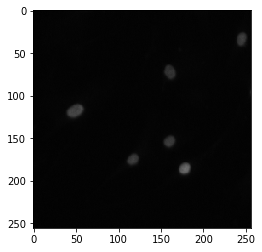

In [4]:
arr = imread(imlist_dp[16])
print("input arr shape: ",arr.shape)
#arr = ski.rgba2rgb(arr)
#arr = ski.rgb2grey(arr)
#arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

In [5]:
arr = imread(imlist_malaria[0])
print("input arr shape: ",arr.shape)
arr = ski.rgba2rgb(arr)
arr = ski.rgb2grey(arr)
arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (1200, 1600, 3)


ValueError: the input array must have a shape == (.., ..,[ ..,] 4)), got (1200, 1600, 3)

input arr shape:  (1600, 1200)
(1600, 1200)


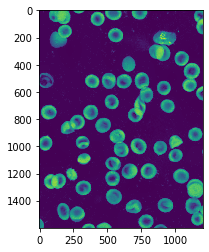

In [6]:
arr = imread(imlist_malaria[0])
arr = (arr.transpose())[0]
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
arr = invert(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (512, 512, 3)
(512, 512)
(512, 512, 3)


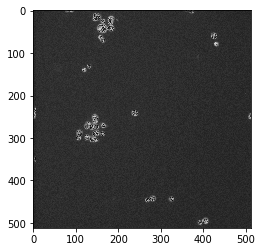

In [7]:
arr = imread(imlist_colon[0])
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
#arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

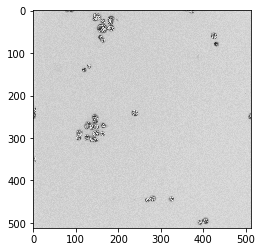

In [8]:
arr = invert(arr)
plt.imshow(arr)

In [9]:
class PrintLayer(nn.Module):
    def __init__(self, index, fig, **kwargs):
        super().__init__(**kwargs)
        self.index = index
        self.fig = fig

    def forward(self, x):
        y=x.detach().cpu().numpy().reshape(512,512,6)
        y1 = y[::1, ::1, 0:3:1]
        y2 = y[::1, ::1, 3:6:1]
        self.fig.add_subplot(4, 4, self.index)
        plt.imshow(y1)
        self.fig.add_subplot(4, 4, self.index+1)
        plt.imshow(y2)
        return x

In [10]:
class TestNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TestNet, self).__init__()
        
        self.fig=plt.figure(figsize=(16, 16))
    
        
        model = [
            nn.Flatten(start_dim=0, end_dim=1),
            nn.Linear(D_in, H),
            PrintLayer(1, self.fig),
            nn.ReLU(inplace=True),
            PrintLayer(3, self.fig),
            nn.Linear(H, D_out),
            #PrintLayer(5, self.fig)
        ]
        
        self.model = nn.Sequential(*model
        )

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        y = self.model(x)
        y = y.reshape(x.shape)
        return y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 2)
DONE
torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


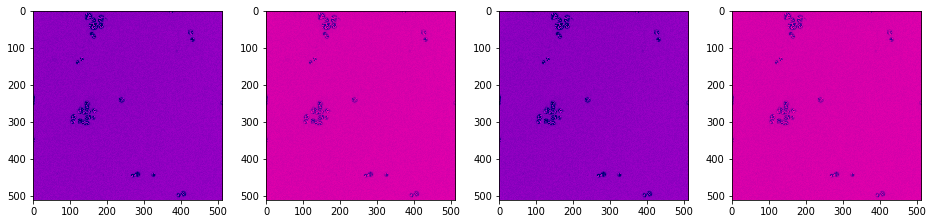

In [11]:
net = TestNet(3, 6, 3)
test = arr
print(arr[::1, ::1, 0:2:1].shape)
print("DONE")
test = torch.Tensor(test)
print(test.shape)
y = net(test)
print(y.shape)
plt.show()

In [3]:
import blocks
import torch
from torch import nn

In [1]:
import blocks
import torch
from torch import nn
x = blocks.InceptionBlock(3, 100, 3, 1)
z = blocks.Conv2dBlock(3,100,3,1)
y = torch.ones((2, 3,12,12))
res = x(y)
print(res.shape)
res2 = z(y)
print(res2.shape)

BLOCKS, INCEPTIONBLOCK: BE AWARE THAT THE CONV2DBLOCK DIDN'T PAD AS MUCH AS THIS ONE
l shape torch.Size([2, 12, 12, 12])
r shape torch.Size([2, 13, 12, 12])
torch.Size([2, 100, 12, 12])
torch.Size([2, 100, 10, 10])


In [2]:
import utils
from globalConstants import GlobalConstants

In [4]:
GlobalConstants.setPrecision("float16_apex")
bs = 4
train_content_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs)
train_class_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs,
                            num_workers=0)

Using APEX
Set precision to: torch.float16
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8


torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])


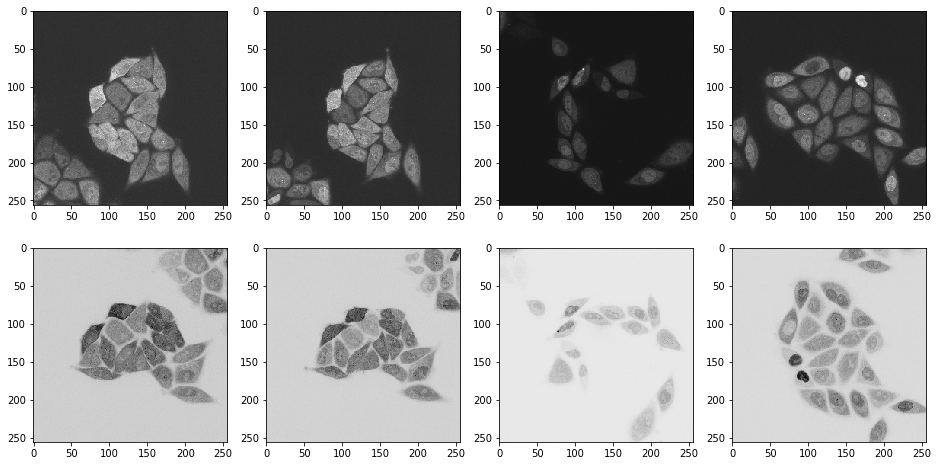

In [26]:
#torch.manual_seed(10000)
    torch.backends.cudnn.deterministic = True
for it, (co_data, cl_data) in enumerate(zip(train_content_loader, train_class_loader)):
    fig=plt.figure(figsize=(16, 8))
    columns = 4
    rows = 2
    j = 0
    print(co_data[0].shape)
    print(cl_data[0].shape)
    for run in range(2):
        if run == 0:
            data = co_data[0]
        else:
            data = cl_data[0]
            for y in range(len(data)):
                data[y] = -1*data[y].transpose(1,2) +1
        for i in range(1, bs+1):
            fig.add_subplot(rows,columns, i+bs*run)
            img = data[i-1]
            img = img.transpose(0, 2)
            plt.imshow(img)
    plt.show()
    """
    for i in range(1, columns*rows +1):
        if j>= len(pth_list):
            break
        print("Class", j+1,": ",classes[j])
        img = load_pic(pth_list[j][index])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    """
    j+=1
    break

In [ ]:
for run in range(2):
    if run == 0:
        data = co_data[0]
    else:
        data = cl_data[0]
    for i in range(1, bs+1):

72
IS SHAPE:  (2048, 2048)
SHOULD BE:  (1608, 1608)


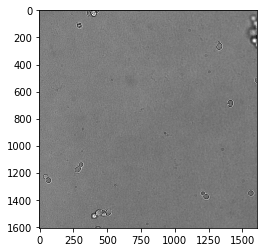

In [57]:
dir_path = "../../../scratch/slivinskiy/cycleGAN/train/A"
save_path = "../../../scratch/slivinskiy/cycleGAN/train/C"
reference_path = "../../../scratch/slivinskiy/cycleGAN/train/B"

pth_list = []
imgs = getImgs(dir_path, "*.tif")
pth_list.append(imgs)

reference_list = []
reference_imgs = getImgs(reference_path, "*.tif")
reference_list.append(reference_imgs)

print(len(pth_list[0]))
print("IS SHAPE: ",imread(pth_list[0][0]).shape)
print("SHOULD BE: ", imread(reference_list[0][0]).shape)
pic = loadAndCrop(pth_list[0][0])

In [72]:
for pth in pth_list[0]:
    name = pth.split("/")[-1]
    pic = loadAndCrop(pth)
    safepath = os.path.join(save_path, name)
    imsave(safepath, pic)

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


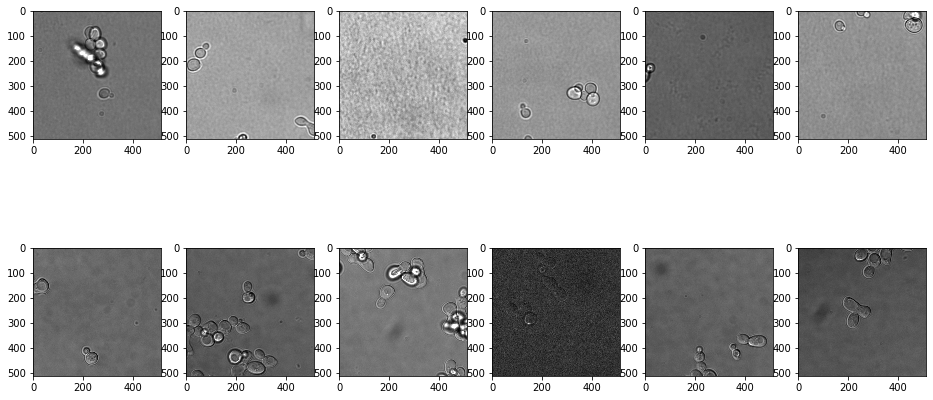

In [66]:
fig=plt.figure(figsize=(16, 8))
index = 35
columns = 6
rows = 2
offset = 10
j = 0
for i in range(1, columns*rows +1):
    img = cropTo(loadAndCrop(pth_list[0][j+offset]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
j=0
for i in range(columns+1, columns*rows +1):
    img = cropTo(imread(reference_list[0][j+offset]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
plt.show()

In [49]:
def loadAndCrop(path):
    pic = imread(path)
    
    crop = iaa.CropToFixedSize(width=1608, height=1608).augment_image
    pic  = crop(pic)
    return pic

In [58]:
def cropTo(pic):
    crop = iaa.CropToFixedSize(width=512, height=512).augment_image
    pic  = crop(pic)
    return pic

# **Conversion of h5 format to tif**

In [91]:
path = "../../../scratch/bunk/BIA083/790c7002ec6c14e2d23dcb61b8041d08.h5"
pathOut = "../../../scratch/slivinskiy/h5Totif"
h5 = h5py.File(path, 'r')
dataset = h5['experiment']
print(dataset.keys())

<KeysViewHDF5 ['overview0', 'overview0_detail0', 'overview0_detail1', 'overview1', 'overview10', 'overview100', 'overview1000', 'overview1001', 'overview1001_detail0', 'overview1002', 'overview1003', 'overview1003_detail0', 'overview1004', 'overview1004_detail0', 'overview1005', 'overview1005_detail0', 'overview1006', 'overview1007', 'overview1008', 'overview1009', 'overview1009_detail0', 'overview101', 'overview1010', 'overview1011', 'overview1011_detail0', 'overview1012', 'overview1013', 'overview1014', 'overview1015', 'overview1016', 'overview1017', 'overview1018', 'overview1019', 'overview102', 'overview1020', 'overview1021', 'overview1022', 'overview1023', 'overview1024', 'overview1025', 'overview1026', 'overview1027', 'overview1028', 'overview1029', 'overview103', 'overview1030', 'overview1031', 'overview1032', 'overview1033', 'overview1033_detail0', 'overview1034', 'overview1035', 'overview1036', 'overview1037', 'overview1038', 'overview1039', 'overview104', 'overview1040', 'ove

<HDF5 dataset "0": shape (1, 17, 333, 333), type "<i2">
<HDF5 dataset "0": shape (1, 1, 1092, 1092), type "<i2">
<HDF5 dataset "0": shape (1, 1, 1008, 1008), type "<i2">
float64
overview0_detail0 0 0 (1092, 1092)
overview0_detail0 0 1 (1092, 1092)
overview0_detail0 0 2 (1092, 1092)
overview0_detail1 0 0 (1008, 1008)
overview0_detail1 0 1 (1008, 1008)
overview0_detail1 0 2 (1008, 1008)
overview1001_detail0 0 0 (1008, 1008)
overview1001_detail0 0 1 (1008, 1008)
overview1001_detail0 0 2 (1008, 1008)
overview1003_detail0 0 0 (588, 588)


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


overview1003_detail0 0 1 (588, 588)
overview1003_detail0 0 2 (588, 588)


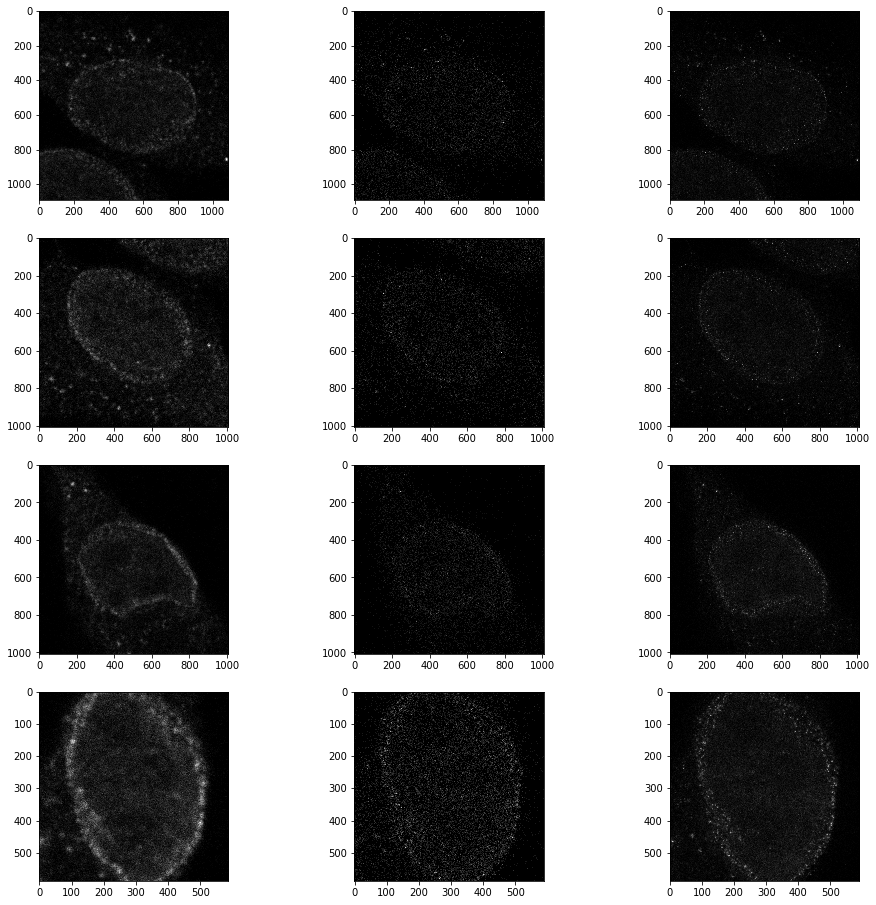

In [82]:
pic0 = dataset['overview0']
pic1 = dataset['overview0_detail0']
pic2 = dataset['overview0_detail1']
pic01 = dataset['overview1']

pic0 = pic0['0']['0']
pic1 = pic1['0']['0']
pic2 = pic2['0']['0']
print(pic0)
print(pic1)
print(pic2)
print(pic0.value.astype(float, copy=False).dtype)

fig=plt.figure(figsize=(16, 16))
index = 35
columns = 3
rows = 4
j = 0
for key in dataset:
    for key1 in dataset[key]:
        for key2 in dataset[key][key1]:
            if (j>=columns*rows):
                break
            img = dataset[key][key1][key2]
            if (img.shape[0] == 1 and img.shape[1] == 1):
                img=img[0][0]
            else:
                continue
            print(key, key1, key2, img.shape)
            fig.add_subplot(rows, columns, j+1)
            plt.imshow(img, cmap="gray")
            j+=1
plt.show()

(17, 333, 333)


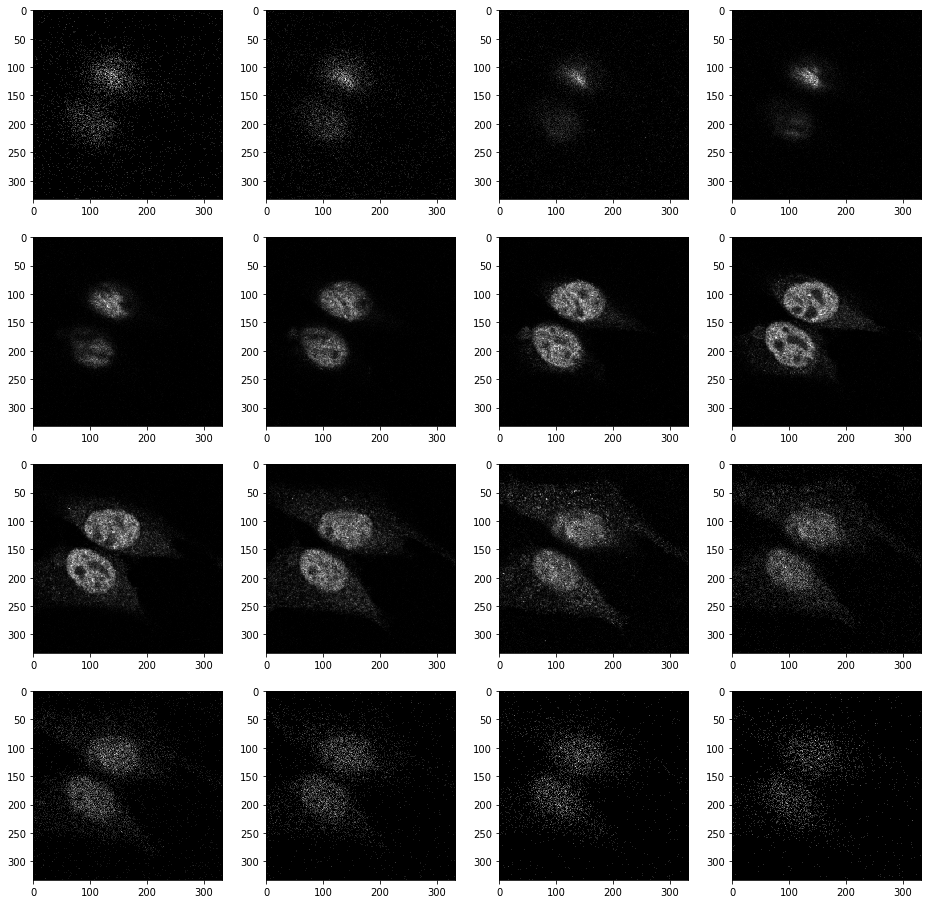

In [83]:
fig=plt.figure(figsize=(16, 16))
index = 35
columns = 4
rows = 4
j = 0
pic0 = dataset['overview0']['0']['0']
pic0 = pic0[0]
print(pic0.shape)
for i in range(pic0.shape[0]):
    if (j>= columns*rows):
        break
    fig.add_subplot(rows, columns, j+1)
    plt.imshow(pic0[i], cmap="gray")
    j+=1
plt.show()

In [94]:
for key in dataset:
    for key1 in dataset[key]:
        if (len(dataset[key][key1]) == 1):
            continue
        for key2 in dataset[key][key1]:
            #print(key, key1, key2)
            #print(dataset[key][key1][key2].shape)
            pic = dataset[key][key1][key2]
            #print("Type: ",pic.dtype)
            name = key+"_"+key2+".tif"
            pic = pic[0][0]
            print(name)
            pathSave = os.path.join(pathOut,name)
            print(pathSave)
            imsave(pathSave, pic)


overview0_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail0_0.tif
overview0_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail0_1.tif
overview0_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail0_2.tif
overview0_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail1_0.tif
overview0_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail1_1.tif
overview0_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview0_detail1_2.tif
overview1001_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1001_detail0_0.tif
overview1001_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1001_detail0_1.tif
overview1001_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1001_detail0_2.tif
overview1003_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1003_detail0_0.tif
overview1003_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1003_detail0_1.tif
overview1003_detail0_2.tif
../../../scratch/sl

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview0_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview0_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview0_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview0_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_laun

overview1005_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1005_detail0_0.tif
overview1005_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1005_detail0_1.tif
overview1005_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1005_detail0_2.tif
overview1009_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1009_detail0_0.tif
overview1009_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1009_detail0_1.tif
overview1009_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1009_detail0_2.tif
overview1011_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1011_detail0_0.tif
overview1011_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1011_detail0_1.tif
overview1011_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1011_detail0_2.tif
overview1033_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1033_detail0_0.tif
overview1033_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1033_detail0_1.tif
overview10

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1005_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1009_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1009_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1009_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1046_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1046_detail0_2.tif
overview1049_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail0_0.tif
overview1049_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail0_1.tif
overview1049_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail0_2.tif
overview1049_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail1_0.tif
overview1049_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail1_1.tif
overview1049_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1049_detail1_2.tif
overview1053_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1053_detail0_0.tif
overview1053_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1053_detail0_1.tif
overview1053_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1053_detail0_2.tif
overview1054_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1054_detail0_0.tif
overview10

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1046_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1049_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1049_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1049_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1066_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1066_detail0_0.tif
overview1066_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1066_detail0_1.tif
overview1066_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1066_detail0_2.tif
overview1067_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1067_detail0_0.tif
overview1067_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1067_detail0_1.tif
overview1067_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1067_detail0_2.tif
overview1073_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1073_detail0_0.tif
overview1073_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1073_detail0_1.tif
overview1073_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1073_detail0_2.tif
overview1085_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1085_detail0_0.tif
overview1085_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1085_detail0_1.tif
overview10

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1067_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1073_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1073_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1073_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1103_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1103_detail0_2.tif
overview1103_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1103_detail1_0.tif
overview1103_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1103_detail1_1.tif
overview1103_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1103_detail1_2.tif
overview1104_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1104_detail0_0.tif
overview1104_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1104_detail0_1.tif
overview1104_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1104_detail0_2.tif
overview1105_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1105_detail0_0.tif
overview1105_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1105_detail0_1.tif
overview1105_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1105_detail0_2.tif
overview1106_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1106_detail0_0.tif
overview11

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1103_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1103_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1103_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1103_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1116_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1116_detail1_2.tif
overview1119_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1119_detail0_0.tif
overview1119_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1119_detail0_1.tif
overview1119_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1119_detail0_2.tif
overview1120_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1120_detail0_0.tif
overview1120_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1120_detail0_1.tif
overview1120_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1120_detail0_2.tif
overview1124_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1124_detail0_0.tif
overview1124_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1124_detail0_1.tif
overview1124_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1124_detail0_2.tif
overview1127_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1127_detail0_0.tif
overview11

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1116_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1119_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1119_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1119_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1130_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail0_0.tif
overview1130_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail0_1.tif
overview1130_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail0_2.tif
overview1130_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail1_0.tif
overview1130_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail1_1.tif
overview1130_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1130_detail1_2.tif
overview1131_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1131_detail0_0.tif
overview1131_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1131_detail0_1.tif
overview1131_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1131_detail0_2.tif
overview1137_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1137_detail0_0.tif
overview1137_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1137_detail0_1.tif
overview11

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1130_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1130_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1130_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1130_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1159_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1159_detail0_2.tif
overview115_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview115_detail0_0.tif
overview115_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview115_detail0_1.tif
overview115_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview115_detail0_2.tif
overview1177_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1177_detail0_0.tif
overview1177_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1177_detail0_1.tif
overview1177_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1177_detail0_2.tif
overview1178_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1178_detail0_0.tif
overview1178_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1178_detail0_1.tif
overview1178_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1178_detail0_2.tif
overview1179_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1179_detail0_0.tif
overview1179_det

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1159_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview115_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview115_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview115_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyke

overview1182_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail1_1.tif
overview1182_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail1_2.tif
overview1182_detail2_0.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail2_0.tif
overview1182_detail2_1.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail2_1.tif
overview1182_detail2_2.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail2_2.tif
overview1182_detail3_0.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail3_0.tif
overview1182_detail3_1.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail3_1.tif
overview1182_detail3_2.tif
../../../scratch/slivinskiy/h5Totif/overview1182_detail3_2.tif
overview118_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview118_detail0_0.tif
overview118_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview118_detail0_1.tif
overview118_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview118_detail0_2.tif
overview1190_det

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1182_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1182_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1182_detail2_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1182_detail2_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1210_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1210_detail0_2.tif
overview1217_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail0_0.tif
overview1217_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail0_1.tif
overview1217_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail0_2.tif
overview1217_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail1_0.tif
overview1217_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail1_1.tif
overview1217_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1217_detail1_2.tif
overview1239_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1239_detail0_0.tif
overview1239_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1239_detail0_1.tif
overview1239_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1239_detail0_2.tif
overview123_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview123_detail0_0.tif
overview123_

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1210_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1217_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1217_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1217_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1251_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1251_detail1_2.tif
overview1253_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1253_detail0_0.tif
overview1253_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1253_detail0_1.tif
overview1253_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1253_detail0_2.tif
overview1254_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1254_detail0_0.tif
overview1254_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1254_detail0_1.tif
overview1254_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1254_detail0_2.tif
overview1256_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1256_detail0_0.tif
overview1256_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1256_detail0_1.tif
overview1256_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1256_detail0_2.tif
overview1267_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1267_detail0_0.tif
overview12

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1251_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1253_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1253_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1253_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1273_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1273_detail0_2.tif
overview1274_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1274_detail0_0.tif
overview1274_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1274_detail0_1.tif
overview1274_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1274_detail0_2.tif
overview1275_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1275_detail0_0.tif
overview1275_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1275_detail0_1.tif
overview1275_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1275_detail0_2.tif
overview1276_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1276_detail0_0.tif
overview1276_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1276_detail0_1.tif
overview1276_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1276_detail0_2.tif
overview1283_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1283_detail0_0.tif
overview12

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1273_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1274_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1274_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1274_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview12_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview12_detail0_1.tif
overview12_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview12_detail0_2.tif
overview1301_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1301_detail0_0.tif
overview1301_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1301_detail0_1.tif
overview1301_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1301_detail0_2.tif
overview1307_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1307_detail0_0.tif
overview1307_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1307_detail0_1.tif
overview1307_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1307_detail0_2.tif
overview1311_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1311_detail0_0.tif
overview1311_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1311_detail0_1.tif
overview1311_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1311_detail0_2.tif
overview1312_detai

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview12_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1301_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1301_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1301_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyk

overview1314_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail0_0.tif
overview1314_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail0_1.tif
overview1314_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail0_2.tif
overview1314_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail1_0.tif
overview1314_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail1_1.tif
overview1314_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1314_detail1_2.tif
overview1315_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1315_detail0_0.tif
overview1315_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1315_detail0_1.tif
overview1315_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1315_detail0_2.tif
overview131_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview131_detail0_0.tif
overview131_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview131_detail0_1.tif
overview131_de

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1314_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1314_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1314_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1314_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1346_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1346_detail0_1.tif
overview1346_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1346_detail0_2.tif
overview135_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview135_detail0_0.tif
overview135_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview135_detail0_1.tif
overview135_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview135_detail0_2.tif
overview1370_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1370_detail0_0.tif
overview1370_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1370_detail0_1.tif
overview1370_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1370_detail0_2.tif
overview1378_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1378_detail0_0.tif
overview1378_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1378_detail0_1.tif
overview1378_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1378_detail0_2.tif
overview1388_det

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1346_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1346_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview135_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview135_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyk

overview1389_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1389_detail0_1.tif
overview1389_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1389_detail0_2.tif
overview138_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview138_detail0_0.tif
overview138_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview138_detail0_1.tif
overview138_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview138_detail0_2.tif
overview1390_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail0_0.tif
overview1390_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail0_1.tif
overview1390_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail0_2.tif
overview1390_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail1_0.tif
overview1390_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail1_1.tif
overview1390_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1390_detail1_2.tif
overview1395_det

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1389_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1389_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview138_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview138_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyk

overview1397_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1397_detail0_0.tif
overview1397_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1397_detail0_1.tif
overview1397_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1397_detail0_2.tif
overview1398_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1398_detail0_0.tif
overview1398_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1398_detail0_1.tif
overview1398_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1398_detail0_2.tif
overview1401_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1401_detail0_0.tif
overview1401_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1401_detail0_1.tif
overview1401_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1401_detail0_2.tif
overview141_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview141_detail0_0.tif
overview141_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview141_detail0_1.tif
overview141_de

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1397_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1397_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1398_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1398_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1422_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1422_detail0_2.tif
overview1423_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1423_detail0_0.tif
overview1423_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1423_detail0_1.tif
overview1423_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1423_detail0_2.tif
overview1429_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1429_detail0_0.tif
overview1429_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1429_detail0_1.tif
overview1429_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1429_detail0_2.tif
overview1430_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1430_detail0_0.tif
overview1430_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1430_detail0_1.tif
overview1430_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1430_detail0_2.tif
overview1432_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1432_detail0_0.tif
overview14

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1422_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1423_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1423_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1423_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1441_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1441_detail0_0.tif
overview1441_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1441_detail0_1.tif
overview1441_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1441_detail0_2.tif
overview1442_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1442_detail0_0.tif
overview1442_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1442_detail0_1.tif
overview1442_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1442_detail0_2.tif
overview1448_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1448_detail0_0.tif
overview1448_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1448_detail0_1.tif
overview1448_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview1448_detail0_2.tif
overview1449_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview1449_detail0_0.tif
overview1449_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview1449_detail0_1.tif
overview14

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1441_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1441_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1441_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview1442_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ip

overview1461_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview1461_detail1_2.tif
overview147_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail0_0.tif
overview147_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail0_1.tif
overview147_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail0_2.tif
overview147_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail1_0.tif
overview147_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail1_1.tif
overview147_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview147_detail1_2.tif
overview14_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview14_detail0_0.tif
overview14_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview14_detail0_1.tif
overview14_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview14_detail0_2.tif
overview14_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview14_detail1_0.tif
overview14_detail1_1.tif
../../../scra

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview147_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview147_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview147_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview147_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview158_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview158_detail0_0.tif
overview158_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview158_detail0_1.tif
overview158_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview158_detail0_2.tif
overview159_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview159_detail0_0.tif
overview159_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview159_detail0_1.tif
overview159_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview159_detail0_2.tif
overview15_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview15_detail0_0.tif
overview15_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview15_detail0_1.tif
overview15_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview15_detail0_2.tif
overview15_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview15_detail1_0.tif
overview15_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview15_detail1_1.tif
overview15_detail1_2.tif
../../../scratch/

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview158_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview158_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview158_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview159_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview160_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview160_detail0_2.tif
overview161_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview161_detail0_0.tif
overview161_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview161_detail0_1.tif
overview161_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview161_detail0_2.tif
overview162_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview162_detail0_0.tif
overview162_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview162_detail0_1.tif
overview162_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview162_detail0_2.tif
overview164_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview164_detail0_0.tif
overview164_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview164_detail0_1.tif
overview164_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview164_detail0_2.tif
overview165_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview165_detail0_0.tif
overview165_detail0_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview161_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview162_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview162_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview162_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview191_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail0_0.tif
overview191_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail0_1.tif
overview191_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail0_2.tif
overview191_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail1_0.tif
overview191_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail1_1.tif
overview191_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview191_detail1_2.tif
overview192_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview192_detail0_0.tif
overview192_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview192_detail0_1.tif
overview192_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview192_detail0_2.tif
overview192_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview192_detail1_0.tif
overview192_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview192_detail1_1.tif
overview192_detail1_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview191_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview191_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview191_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview191_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview195_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview195_detail1_1.tif
overview195_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview195_detail1_2.tif
overview198_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview198_detail0_0.tif
overview198_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview198_detail0_1.tif
overview198_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview198_detail0_2.tif
overview199_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview199_detail0_0.tif
overview199_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview199_detail0_1.tif
overview199_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview199_detail0_2.tif
overview205_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview205_detail0_0.tif
overview205_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview205_detail0_1.tif
overview205_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview205_detail0_2.tif
overview207_detail0_0.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview198_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview198_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview198_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview199_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview216_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview216_detail0_1.tif
overview216_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview216_detail0_2.tif
overview217_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview217_detail0_0.tif
overview217_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview217_detail0_1.tif
overview217_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview217_detail0_2.tif
overview222_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview222_detail0_0.tif
overview222_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview222_detail0_1.tif
overview222_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview222_detail0_2.tif
overview224_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview224_detail0_0.tif
overview224_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview224_detail0_1.tif
overview224_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview224_detail0_2.tif
overview22_detail0_0.tif
../../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview216_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview217_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview217_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview217_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview235_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview235_detail0_1.tif
overview235_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview235_detail0_2.tif
overview244_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview244_detail0_0.tif
overview244_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview244_detail0_1.tif
overview244_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview244_detail0_2.tif
overview246_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail0_0.tif
overview246_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail0_1.tif
overview246_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail0_2.tif
overview246_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail1_0.tif
overview246_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail1_1.tif
overview246_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview246_detail1_2.tif
overview250_detail0_0.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview235_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview244_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview244_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview244_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview252_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview252_detail0_2.tif
overview252_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview252_detail1_0.tif
overview252_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview252_detail1_1.tif
overview252_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview252_detail1_2.tif
overview254_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview254_detail0_0.tif
overview254_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview254_detail0_1.tif
overview254_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview254_detail0_2.tif
overview256_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview256_detail0_0.tif
overview256_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview256_detail0_1.tif
overview256_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview256_detail0_2.tif
overview257_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview257_detail0_0.tif
overview257_detail0_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview252_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview252_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview252_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview252_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview257_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview257_detail0_2.tif
overview258_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail0_0.tif
overview258_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail0_1.tif
overview258_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail0_2.tif
overview258_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail1_0.tif
overview258_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail1_1.tif
overview258_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview258_detail1_2.tif
overview259_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview259_detail0_0.tif
overview259_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview259_detail0_1.tif
overview259_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview259_detail0_2.tif
overview259_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview259_detail1_0.tif
overview259_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview258_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview258_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview258_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview258_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview269_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview269_detail0_2.tif
overview274_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview274_detail0_0.tif
overview274_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview274_detail0_1.tif
overview274_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview274_detail0_2.tif
overview277_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview277_detail0_0.tif
overview277_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview277_detail0_1.tif
overview277_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview277_detail0_2.tif
overview278_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview278_detail0_0.tif
overview278_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview278_detail0_1.tif
overview278_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview278_detail0_2.tif
overview278_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview278_detail1_0.tif
overview278_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview269_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview274_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview274_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview274_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview284_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview284_detail0_2.tif
overview285_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview285_detail0_0.tif
overview285_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview285_detail0_1.tif
overview285_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview285_detail0_2.tif
overview303_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview303_detail0_0.tif
overview303_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview303_detail0_1.tif
overview303_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview303_detail0_2.tif
overview304_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview304_detail0_0.tif
overview304_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview304_detail0_1.tif
overview304_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview304_detail0_2.tif
overview304_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview304_detail1_0.tif
overview304_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview285_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview285_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview285_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview303_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview319_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail0_0.tif
overview319_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail0_1.tif
overview319_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail0_2.tif
overview319_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail1_0.tif
overview319_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail1_1.tif
overview319_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview319_detail1_2.tif
overview320_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview320_detail0_0.tif
overview320_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview320_detail0_1.tif
overview320_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview320_detail0_2.tif
overview323_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview323_detail0_0.tif
overview323_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview323_detail0_1.tif
overview323_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview319_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview319_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview320_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview320_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview325_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview325_detail0_2.tif
overview326_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview326_detail0_0.tif
overview326_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview326_detail0_1.tif
overview326_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview326_detail0_2.tif
overview327_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview327_detail0_0.tif
overview327_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview327_detail0_1.tif
overview327_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview327_detail0_2.tif
overview328_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview328_detail0_0.tif
overview328_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview328_detail0_1.tif
overview328_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview328_detail0_2.tif
overview328_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview328_detail1_0.tif
overview328_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview327_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview327_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview327_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview328_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview344_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview344_detail0_1.tif
overview344_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview344_detail0_2.tif
overview345_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview345_detail0_0.tif
overview345_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview345_detail0_1.tif
overview345_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview345_detail0_2.tif
overview347_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview347_detail0_0.tif
overview347_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview347_detail0_1.tif
overview347_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview347_detail0_2.tif
overview352_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview352_detail0_0.tif
overview352_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview352_detail0_1.tif
overview352_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview352_detail0_2.tif
overview361_detail0_0.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview344_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview345_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview345_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview345_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview380_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview380_detail0_1.tif
overview380_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview380_detail0_2.tif
overview381_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview381_detail0_0.tif
overview381_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview381_detail0_1.tif
overview381_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview381_detail0_2.tif
overview395_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail0_0.tif
overview395_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail0_1.tif
overview395_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail0_2.tif
overview395_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail1_0.tif
overview395_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail1_1.tif
overview395_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview395_detail1_2.tif
overview3_detail0_0.tif
../../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview380_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview381_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview381_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview381_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview409_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview409_detail0_1.tif
overview409_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview409_detail0_2.tif
overview413_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail0_0.tif
overview413_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail0_1.tif
overview413_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail0_2.tif
overview413_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail1_0.tif
overview413_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail1_1.tif
overview413_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview413_detail1_2.tif
overview416_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview416_detail0_0.tif
overview416_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview416_detail0_1.tif
overview416_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview416_detail0_2.tif
overview41_detail0_0.tif
../../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview413_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview413_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview413_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview413_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview428_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview428_detail0_1.tif
overview428_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview428_detail0_2.tif
overview435_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview435_detail0_0.tif
overview435_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview435_detail0_1.tif
overview435_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview435_detail0_2.tif
overview441_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview441_detail0_0.tif
overview441_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview441_detail0_1.tif
overview441_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview441_detail0_2.tif
overview443_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview443_detail0_0.tif
overview443_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview443_detail0_1.tif
overview443_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview443_detail0_2.tif
overview447_detail0_0.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview428_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview435_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview435_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview435_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview450_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview450_detail0_2.tif
overview452_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview452_detail0_0.tif
overview452_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview452_detail0_1.tif
overview452_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview452_detail0_2.tif
overview453_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail0_0.tif
overview453_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail0_1.tif
overview453_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail0_2.tif
overview453_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail1_0.tif
overview453_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail1_1.tif
overview453_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview453_detail1_2.tif
overview459_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview459_detail0_0.tif
overview459_detail0_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview452_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview452_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview452_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview453_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview475_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview475_detail0_2.tif
overview47_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview47_detail0_0.tif
overview47_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview47_detail0_1.tif
overview47_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview47_detail0_2.tif
overview482_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview482_detail0_0.tif
overview482_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview482_detail0_1.tif
overview482_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview482_detail0_2.tif
overview483_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview483_detail0_0.tif
overview483_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview483_detail0_1.tif
overview483_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview483_detail0_2.tif
overview483_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview483_detail1_0.tif
overview483_detail1_1.tif
../../../scr

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview475_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview47_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview47_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview47_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel

overview48_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview48_detail1_0.tif
overview48_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview48_detail1_1.tif
overview48_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview48_detail1_2.tif
overview490_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview490_detail0_0.tif
overview490_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview490_detail0_1.tif
overview490_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview490_detail0_2.tif
overview493_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview493_detail0_0.tif
overview493_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview493_detail0_1.tif
overview493_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview493_detail0_2.tif
overview497_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview497_detail0_0.tif
overview497_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview497_detail0_1.tif
overview497_detail0_2.tif
../../../scr

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview48_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview48_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview490_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview490_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykerne

overview499_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview499_detail0_2.tif
overview4_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview4_detail0_0.tif
overview4_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview4_detail0_1.tif
overview4_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview4_detail0_2.tif
overview501_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview501_detail0_0.tif
overview501_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview501_detail0_1.tif
overview501_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview501_detail0_2.tif
overview512_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview512_detail0_0.tif
overview512_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview512_detail0_1.tif
overview512_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview512_detail0_2.tif
overview514_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview514_detail0_0.tif
overview514_detail0_1.tif
../../../scratch/s

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview499_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview4_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview4_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview4_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_la

overview527_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview527_detail0_1.tif
overview527_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview527_detail0_2.tif
overview529_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview529_detail0_0.tif
overview529_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview529_detail0_1.tif
overview529_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview529_detail0_2.tif
overview536_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview536_detail0_0.tif
overview536_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview536_detail0_1.tif
overview536_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview536_detail0_2.tif
overview537_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview537_detail0_0.tif
overview537_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview537_detail0_1.tif
overview537_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview537_detail0_2.tif
overview53_detail0_0.tif
../../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview527_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview527_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview529_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview529_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview541_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview541_detail0_2.tif
overview547_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview547_detail0_0.tif
overview547_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview547_detail0_1.tif
overview547_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview547_detail0_2.tif
overview548_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview548_detail0_0.tif
overview548_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview548_detail0_1.tif
overview548_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview548_detail0_2.tif
overview551_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview551_detail0_0.tif
overview551_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview551_detail0_1.tif
overview551_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview551_detail0_2.tif
overview551_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview551_detail1_0.tif
overview551_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview547_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview547_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview547_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview548_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview559_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview559_detail0_0.tif
overview559_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview559_detail0_1.tif
overview559_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview559_detail0_2.tif
overview560_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview560_detail0_0.tif
overview560_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview560_detail0_1.tif
overview560_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview560_detail0_2.tif
overview562_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview562_detail0_0.tif
overview562_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview562_detail0_1.tif
overview562_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview562_detail0_2.tif
overview563_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview563_detail0_0.tif
overview563_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview563_detail0_1.tif
overview563_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview559_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview559_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview560_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview560_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview575_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview575_detail0_2.tif
overview583_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview583_detail0_0.tif
overview583_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview583_detail0_1.tif
overview583_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview583_detail0_2.tif
overview584_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview584_detail0_0.tif
overview584_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview584_detail0_1.tif
overview584_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview584_detail0_2.tif
overview585_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview585_detail0_0.tif
overview585_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview585_detail0_1.tif
overview585_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview585_detail0_2.tif
overview585_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview585_detail1_0.tif
overview585_detail1_1.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview583_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview584_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview584_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview584_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview619_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview619_detail1_1.tif
overview619_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview619_detail1_2.tif
overview624_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview624_detail0_0.tif
overview624_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview624_detail0_1.tif
overview624_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview624_detail0_2.tif
overview628_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview628_detail0_0.tif
overview628_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview628_detail0_1.tif
overview628_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview628_detail0_2.tif
overview629_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview629_detail0_0.tif
overview629_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview629_detail0_1.tif
overview629_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview629_detail0_2.tif
overview630_detail0_0.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview628_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview628_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview628_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview629_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview643_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview643_detail0_0.tif
overview643_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview643_detail0_1.tif
overview643_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview643_detail0_2.tif
overview644_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail0_0.tif
overview644_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail0_1.tif
overview644_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail0_2.tif
overview644_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail1_0.tif
overview644_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail1_1.tif
overview644_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview644_detail1_2.tif
overview645_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview645_detail0_0.tif
overview645_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview645_detail0_1.tif
overview645_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview643_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview644_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview644_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview644_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview649_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview649_detail0_2.tif
overview649_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview649_detail1_0.tif
overview649_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview649_detail1_1.tif
overview649_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview649_detail1_2.tif
overview65_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview65_detail0_0.tif
overview65_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview65_detail0_1.tif
overview65_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview65_detail0_2.tif
overview662_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview662_detail0_0.tif
overview662_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview662_detail0_1.tif
overview662_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview662_detail0_2.tif
overview662_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview662_detail1_0.tif
overview662_detail1_1.tif
../../../scr

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview649_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview649_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview65_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview65_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykerne

overview674_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview674_detail0_0.tif
overview674_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview674_detail0_1.tif
overview674_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview674_detail0_2.tif
overview675_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview675_detail0_0.tif
overview675_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview675_detail0_1.tif
overview675_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview675_detail0_2.tif
overview677_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview677_detail0_0.tif
overview677_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview677_detail0_1.tif
overview677_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview677_detail0_2.tif
overview677_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview677_detail1_0.tif
overview677_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview677_detail1_1.tif
overview677_detail1_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview675_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview677_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview677_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview677_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview691_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview691_detail0_2.tif
overview696_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail0_0.tif
overview696_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail0_1.tif
overview696_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail0_2.tif
overview696_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail1_0.tif
overview696_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail1_1.tif
overview696_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview696_detail1_2.tif
overview69_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview69_detail0_0.tif
overview69_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview69_detail0_1.tif
overview69_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview69_detail0_2.tif
overview69_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview69_detail1_0.tif
overview69_detail1_1.tif
../../../scratc

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview696_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview696_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview696_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview696_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview711_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview711_detail0_0.tif
overview711_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview711_detail0_1.tif
overview711_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview711_detail0_2.tif
overview724_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview724_detail0_0.tif
overview724_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview724_detail0_1.tif
overview724_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview724_detail0_2.tif
overview725_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview725_detail0_0.tif
overview725_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview725_detail0_1.tif
overview725_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview725_detail0_2.tif
overview741_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview741_detail0_0.tif
overview741_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview741_detail0_1.tif
overview741_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview724_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview724_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview725_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview725_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview744_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview744_detail0_0.tif
overview744_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview744_detail0_1.tif
overview744_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview744_detail0_2.tif
overview750_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview750_detail0_0.tif
overview750_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview750_detail0_1.tif
overview750_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview750_detail0_2.tif
overview752_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview752_detail0_0.tif
overview752_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview752_detail0_1.tif
overview752_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview752_detail0_2.tif
overview753_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview753_detail0_0.tif
overview753_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview753_detail0_1.tif
overview753_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview744_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview750_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview750_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview750_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview753_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview753_detail1_0.tif
overview753_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview753_detail1_1.tif
overview753_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview753_detail1_2.tif
overview754_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail0_0.tif
overview754_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail0_1.tif
overview754_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail0_2.tif
overview754_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail1_0.tif
overview754_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail1_1.tif
overview754_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview754_detail1_2.tif
overview755_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview755_detail0_0.tif
overview755_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview755_detail0_1.tif
overview755_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview754_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview754_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview754_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview754_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview76_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview76_detail0_2.tif
overview770_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview770_detail0_0.tif
overview770_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview770_detail0_1.tif
overview770_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview770_detail0_2.tif
overview771_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview771_detail0_0.tif
overview771_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview771_detail0_1.tif
overview771_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview771_detail0_2.tif
overview773_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview773_detail0_0.tif
overview773_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview773_detail0_1.tif
overview773_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview773_detail0_2.tif
overview774_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview774_detail0_0.tif
overview774_detail0_1.tif
../../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview770_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview770_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview770_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview771_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview776_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview776_detail0_2.tif
overview77_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail0_0.tif
overview77_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail0_1.tif
overview77_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail0_2.tif
overview77_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail1_0.tif
overview77_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail1_1.tif
overview77_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview77_detail1_2.tif
overview781_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview781_detail0_0.tif
overview781_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview781_detail0_1.tif
overview781_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview781_detail0_2.tif
overview784_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview784_detail0_0.tif
overview784_detail0_1.tif
../../../scratch/s

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview77_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview77_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview77_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview77_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_

overview790_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview790_detail0_2.tif
overview791_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview791_detail0_0.tif
overview791_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview791_detail0_1.tif
overview791_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview791_detail0_2.tif
overview792_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview792_detail0_0.tif
overview792_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview792_detail0_1.tif
overview792_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview792_detail0_2.tif
overview796_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview796_detail0_0.tif
overview796_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview796_detail0_1.tif
overview796_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview796_detail0_2.tif
overview79_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview79_detail0_0.tif
overview79_detail0_1.tif
../../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview791_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview792_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview792_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview792_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview80_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview80_detail0_0.tif
overview80_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview80_detail0_1.tif
overview80_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview80_detail0_2.tif
overview811_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail0_0.tif
overview811_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail0_1.tif
overview811_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail0_2.tif
overview811_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail1_0.tif
overview811_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail1_1.tif
overview811_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview811_detail1_2.tif
overview812_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview812_detail0_0.tif
overview812_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview812_detail0_1.tif
overview812_detail0_2.tif
../../../scr

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview811_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview811_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview811_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview811_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview839_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview839_detail0_0.tif
overview839_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview839_detail0_1.tif
overview839_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview839_detail0_2.tif
overview840_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview840_detail0_0.tif
overview840_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview840_detail0_1.tif
overview840_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview840_detail0_2.tif
overview842_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview842_detail0_0.tif
overview842_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview842_detail0_1.tif
overview842_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview842_detail0_2.tif
overview846_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview846_detail0_0.tif
overview846_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview846_detail0_1.tif
overview846_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview839_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview839_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview840_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview840_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview866_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview866_detail0_1.tif
overview866_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview866_detail0_2.tif
overview867_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview867_detail0_0.tif
overview867_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview867_detail0_1.tif
overview867_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview867_detail0_2.tif
overview86_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview86_detail0_0.tif
overview86_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview86_detail0_1.tif
overview86_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview86_detail0_2.tif
overview870_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview870_detail0_0.tif
overview870_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview870_detail0_1.tif
overview870_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview870_detail0_2.tif
overview870_detail1_0.tif
../../../scr

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview867_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview867_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview867_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview86_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykern

overview881_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail0_0.tif
overview881_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail0_1.tif
overview881_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail0_2.tif
overview881_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail1_0.tif
overview881_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail1_1.tif
overview881_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview881_detail1_2.tif
overview882_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview882_detail0_0.tif
overview882_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview882_detail0_1.tif
overview882_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview882_detail0_2.tif
overview882_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview882_detail1_0.tif
overview882_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview882_detail1_1.tif
overview882_detail1_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview881_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview881_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview881_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview882_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview8_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail0_0.tif
overview8_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail0_1.tif
overview8_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail0_2.tif
overview8_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail1_0.tif
overview8_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail1_1.tif
overview8_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview8_detail1_2.tif
overview903_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview903_detail0_0.tif
overview903_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview903_detail0_1.tif
overview903_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview903_detail0_2.tif
overview906_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview906_detail0_0.tif
overview906_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview906_detail0_1.tif
overview906_detail0_2.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview8_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview8_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview8_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview8_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_laun

overview912_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview912_detail0_0.tif
overview912_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview912_detail0_1.tif
overview912_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview912_detail0_2.tif
overview913_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview913_detail0_0.tif
overview913_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview913_detail0_1.tif
overview913_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview913_detail0_2.tif
overview925_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview925_detail0_0.tif
overview925_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview925_detail0_1.tif
overview925_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview925_detail0_2.tif
overview927_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview927_detail0_0.tif
overview927_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview927_detail0_1.tif
overview927_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview912_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview913_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview913_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview913_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview929_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview929_detail0_0.tif
overview929_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview929_detail0_1.tif
overview929_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview929_detail0_2.tif
overview92_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail0_0.tif
overview92_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail0_1.tif
overview92_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail0_2.tif
overview92_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail1_0.tif
overview92_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail1_1.tif
overview92_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail1_2.tif
overview92_detail2_0.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail2_0.tif
overview92_detail2_1.tif
../../../scratch/slivinskiy/h5Totif/overview92_detail2_1.tif
overview92_detail2_2.tif
../../../scratch/slivin

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview929_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview929_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview92_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview92_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykerne

overview944_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview944_detail1_0.tif
overview944_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview944_detail1_1.tif
overview944_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview944_detail1_2.tif
overview945_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail0_0.tif
overview945_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail0_1.tif
overview945_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail0_2.tif
overview945_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail1_0.tif
overview945_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail1_1.tif
overview945_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview945_detail1_2.tif
overview953_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview953_detail0_0.tif
overview953_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview953_detail0_1.tif
overview953_detail0_2.tif
../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview945_detail1_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview945_detail1_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview945_detail1_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview953_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview975_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview975_detail0_1.tif
overview975_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview975_detail0_2.tif
overview976_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail0_0.tif
overview976_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail0_1.tif
overview976_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail0_2.tif
overview976_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail1_0.tif
overview976_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail1_1.tif
overview976_detail1_2.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail1_2.tif
overview976_detail2_0.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail2_0.tif
overview976_detail2_1.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail2_1.tif
overview976_detail2_2.tif
../../../scratch/slivinskiy/h5Totif/overview976_detail2_2.tif
overview97_detail0_0.tif
../../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview975_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview976_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview976_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview976_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview97_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview97_detail0_2.tif
overview981_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview981_detail0_0.tif
overview981_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview981_detail0_1.tif
overview981_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview981_detail0_2.tif
overview986_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview986_detail0_0.tif
overview986_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview986_detail0_1.tif
overview986_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview986_detail0_2.tif
overview987_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview987_detail0_0.tif
overview987_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview987_detail0_1.tif
overview987_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview987_detail0_2.tif
overview98_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview98_detail0_0.tif
overview98_detail0_1.tif
../../../sc

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview981_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview981_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview981_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview986_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipyker

overview999_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview999_detail0_0.tif
overview999_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview999_detail0_1.tif
overview999_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview999_detail0_2.tif
overview99_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview99_detail0_0.tif
overview99_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview99_detail0_1.tif
overview99_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview99_detail0_2.tif
overview9_detail0_0.tif
../../../scratch/slivinskiy/h5Totif/overview9_detail0_0.tif
overview9_detail0_1.tif
../../../scratch/slivinskiy/h5Totif/overview9_detail0_1.tif
overview9_detail0_2.tif
../../../scratch/slivinskiy/h5Totif/overview9_detail0_2.tif
overview9_detail1_0.tif
../../../scratch/slivinskiy/h5Totif/overview9_detail1_0.tif
overview9_detail1_1.tif
../../../scratch/slivinskiy/h5Totif/overview9_detail1_1.tif
overview9_detail1_2.tif
../../../scratch/slivinskiy/h5Toti

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview99_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview99_detail0_2.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview9_detail0_0.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: ../../../scratch/slivinskiy/h5Totif/overview9_detail0_1.tif is a low contrast image
  from ipykernel import kernelapp as app
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_la